In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
data = pd.read_csv('restaurant.csv',encoding='cp949',low_memory = False) #csv 한글 = cp949 
plt.rcParams['font.family'] = 'Malgun Gothic' # 한국어
# [지방행정 인허가 데이터개]방에서 [일반 음식점 csv] 파일 필요

In [83]:
data_1 = data[['번호','개방서비스명','영업상태명','영업상태구분코드','사업장명','소재지전체주소','도로명전체주소']]
data_1 = data_1.dropna(subset=['소재지전체주소','사업장명'])
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별시')]
data_3 = data_2[data_2['개방서비스명'].str.contains('일반음식점')]
data_4 = data_3[data_3['영업상태명'] != '폐업']

In [84]:
data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]
data_5 = data_4.groupby('시군구').size().reset_index(name = '사업장수')


C:\Users\User\AppData\Local\Temp\ipykernel_11416\2487579662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]


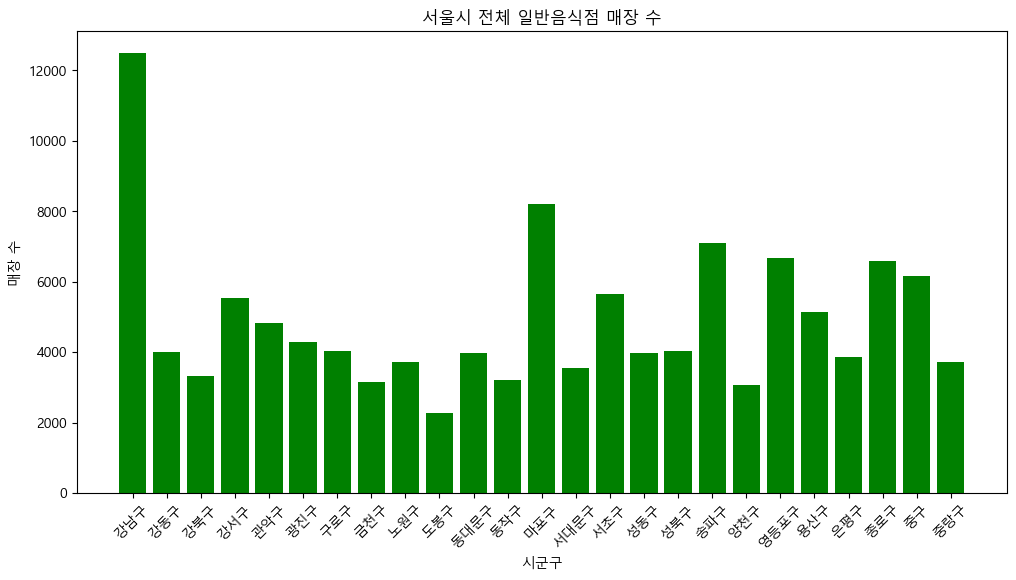

In [85]:
plt.figure(figsize=(12,6))
plt.bar(data_5['시군구'], data_5['사업장수'], color='green')
plt.xticks(rotation = 45)
plt.title('서울시 전체 일반음식점 매장 수')
plt.xlabel('시군구')
plt.ylabel('매장 수')
plt.show()